## **1. Install `bio-check`.**
### _This tooling can be accessed on PyPI as such:_

In [1]:
# !pip install -q bio-check

## **2. Import the `Verifier`:**

In [2]:
from pprint import pp

from bio_check import Verifier, __version__


f'Current version of bio-check: {__version__}'

'Current version of bio-check: 1.4.0'

## **3. Instantiate the `Verifier`:**

In [3]:
verifier = Verifier()

{'bio-check-message': 'Hello from the Verification Service API!'}


## **4. Use the new instance to submit a new verification:**
### _There are 3 possible entry-points for verifications/comparisons:_
#### - OMEX/COMBINE archive. **We will use this for our example**.
#### - SBML File.
#### - Antimony Model (as a `str`)

#### **NOTE: _For each verification "job", users may also optionally submit an "expected results" file in HDF5 (`.h5`) format defining datasets of expected results to be included in the comparison calculation. Please refer to [the HDF5 documentation](https://docs.h5py.org/en/stable/) for more information on the use of HDF5 with Python._**

### **We can use the verifier's `.get_compatible()` method to find which simulators are compatible with our OMEX input file:**

In [5]:
omex_filepath = '../model-examples/sbml-core/Elowitz-Nature-2000-Repressilator.omex'
report_filepath = '../model-examples/sbml-core/Elowitz-Nature-2000-Repressilator/reports.h5'
rel_tol = None
abs_tol = None

simulators = verifier.get_compatible(file=omex_filepath, versions=False)
simulators.sort()

simulators

['amici', 'copasi', 'tellurium']

### **The `Verifier` has two unique methods for submitting new verifications based on the individual requirements of OMEX/COMBINE and SBML verifications, respectively.**

#### _Relative(`rTol[float]`) & Absolute(`aTol[float`) tolerances for proximity comparisons as well as `comparison_id[str]`, `include_outputs[bool]`, and `_steady_state[bool]` may be included as keyword arguments in addition to that which is specified below:_

In [6]:
submission = verifier.verify_omex(
    omex_filepath=omex_filepath,
    simulators=simulators,
    expected_results=report_filepath,
    rTol=rel_tol,
    aTol=abs_tol
)

Selection list: None


In [7]:
submission

{'job_id': 'bio_check-request-ba8caf28-3350-4e17-905c-8b768b98b517_35987621-19c0-43c1-a83d-2d031d537240',
 'status': 'PENDING',
 'timestamp': '2024-08-12 13:54:13.175583',
 'comparison_id': None,
 'path': 'file_uploads/bio_check-request-ba8caf28-3350-4e17-905c-8b768b98b517_35987621-19c0-43c1-a83d-2d031d537240/Elowitz-Nature-2000-Repressilator.omex',
 'simulators': ['amici,copasi,tellurium'],
 'expected_results': 'file_uploads/bio_check-request-ba8caf28-3350-4e17-905c-8b768b98b517_35987621-19c0-43c1-a83d-2d031d537240/reports.h5',
 'include_output': True,
 'rTol': None,
 'aTol': None,
 'selection_list': None}

**PLEASE NOTE: passing/setting `_steady_state` to `True` in the call below will result in a `NotImplementedError` being raised as this feature is currently under development and for demonstration purposes only.**

## **5. Get submission job result data via the `Verifier`'s `.get_verify_output()` method using the above submission's `'job_id'`. Here is an already run job id:**

In [8]:
submission_id = "repressilator_demo_85b85f4a-8279-455e-b6ab-c3c5fd27d488"

In [14]:
verification_data = verifier.get_verify_output(submission_id)

#### Root mean-squared error is calculated for simulators over the entire space of observables based on their scores for each respective observable:

In [15]:
verification_data['content']['results']['rmse']

{'amici': 0.00017356297852656993,
 'copasi': 0.0003181491692907841,
 'tellurium': 0.0004800004922470449,
 'expected_results': 0.0003181491692907841}

#### Mean-squared error and Proximity scores are also available for each output observable. For example, `cI mRNA`:

In [22]:
ci_mrna_data = verification_data['content']['results']['results']['cI mRNA']

pp(ci_mrna_data['proximity'])

{'amici': {'amici': True,
           'copasi': True,
           'tellurium': True,
           'expected_results': True},
 'copasi': {'amici': True,
            'copasi': True,
            'tellurium': True,
            'expected_results': True},
 'tellurium': {'amici': True,
               'copasi': True,
               'tellurium': True,
               'expected_results': True},
 'expected_results': {'amici': True,
                      'copasi': True,
                      'tellurium': True,
                      'expected_results': True}}


In [23]:
pp(ci_mrna_data['mse'])

{'amici': {'amici': 0.0,
           'copasi': 1.3046843397092567e-08,
           'tellurium': 9.945913020103205e-08,
           'expected_results': 1.3046843397092567e-08},
 'copasi': {'amici': 1.3046843397092567e-08,
            'copasi': 0.0,
            'tellurium': 1.8306527496148398e-07,
            'expected_results': 0.0},
 'tellurium': {'amici': 9.945913020103205e-08,
               'copasi': 1.8306527496148398e-07,
               'tellurium': 0.0,
               'expected_results': 1.8306527496148398e-07},
 'expected_results': {'amici': 1.3046843397092567e-08,
                      'copasi': 0.0,
                      'tellurium': 1.8306527496148398e-07,
                      'expected_results': 0.0}}


## **5. Visualize simulation observables indexed by simulator**:

#### _Use the `"simulators"` -based hue for line-color. This will result in each column being of a different hue._

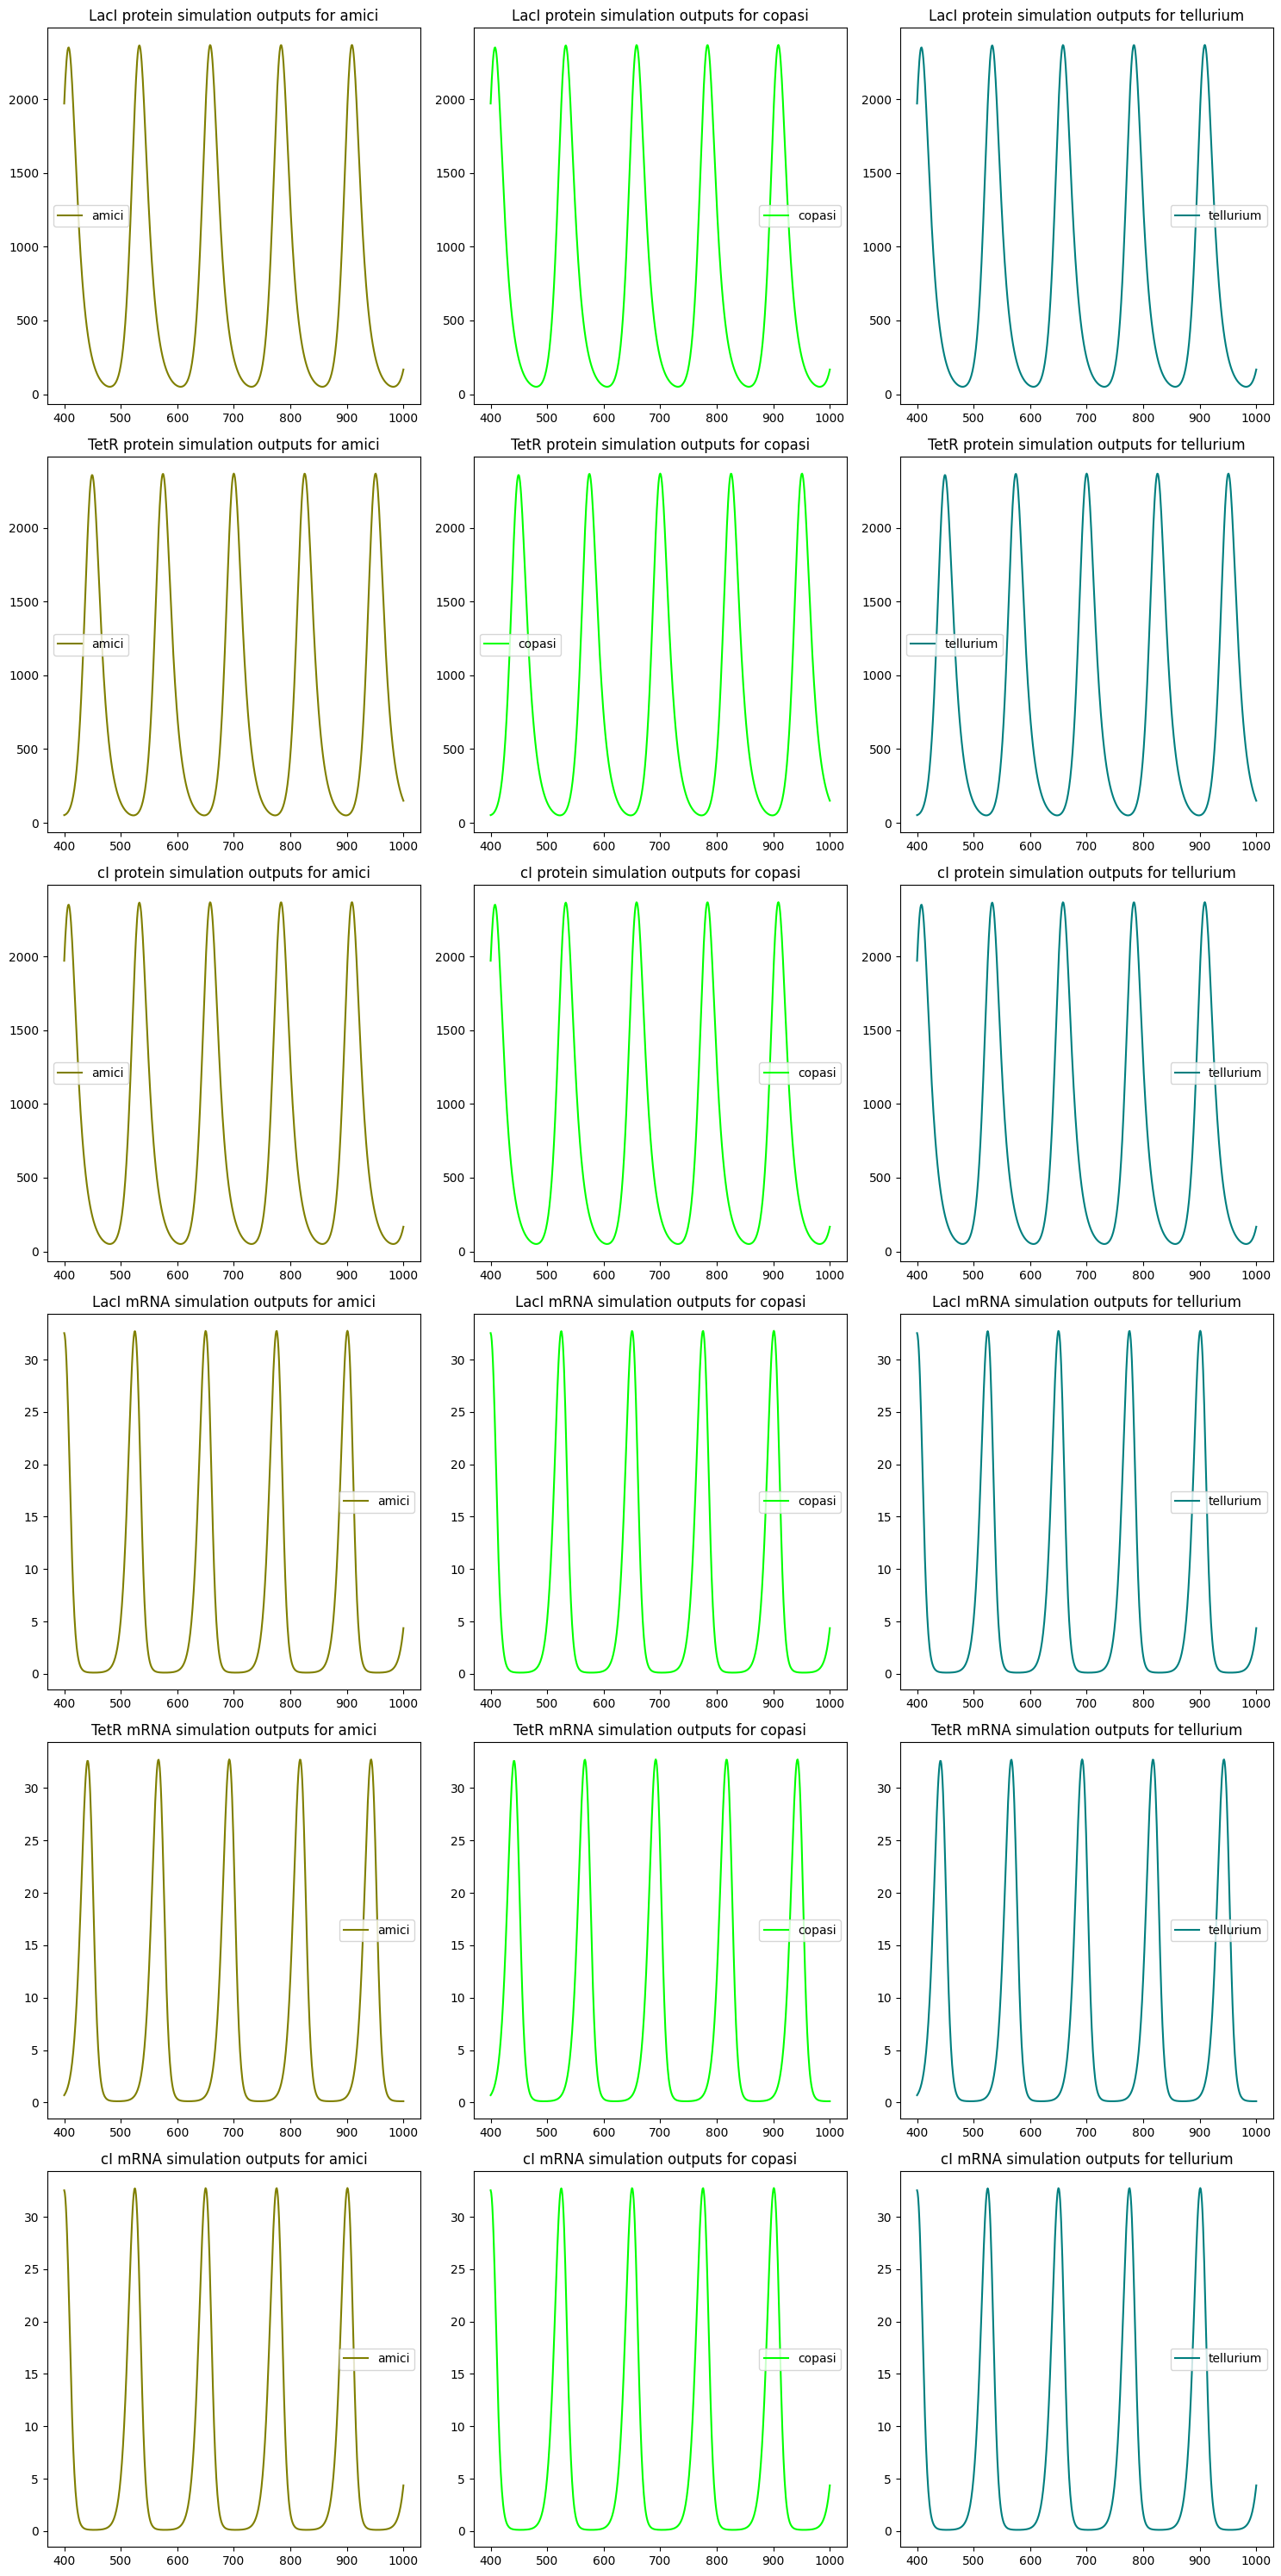

In [24]:
# you can slice/display data by both time and simulator dimensions:
output_plots_simulator_hue = verifier.visualize_outputs(
    data=verification_data,
    simulators=['amici', 'copasi', 'tellurium'],
    output_start=400,
    output_end=1000,
    num_points=600,
    hue='simulators'
)

### Same visualization, but using the `"species"` hue.

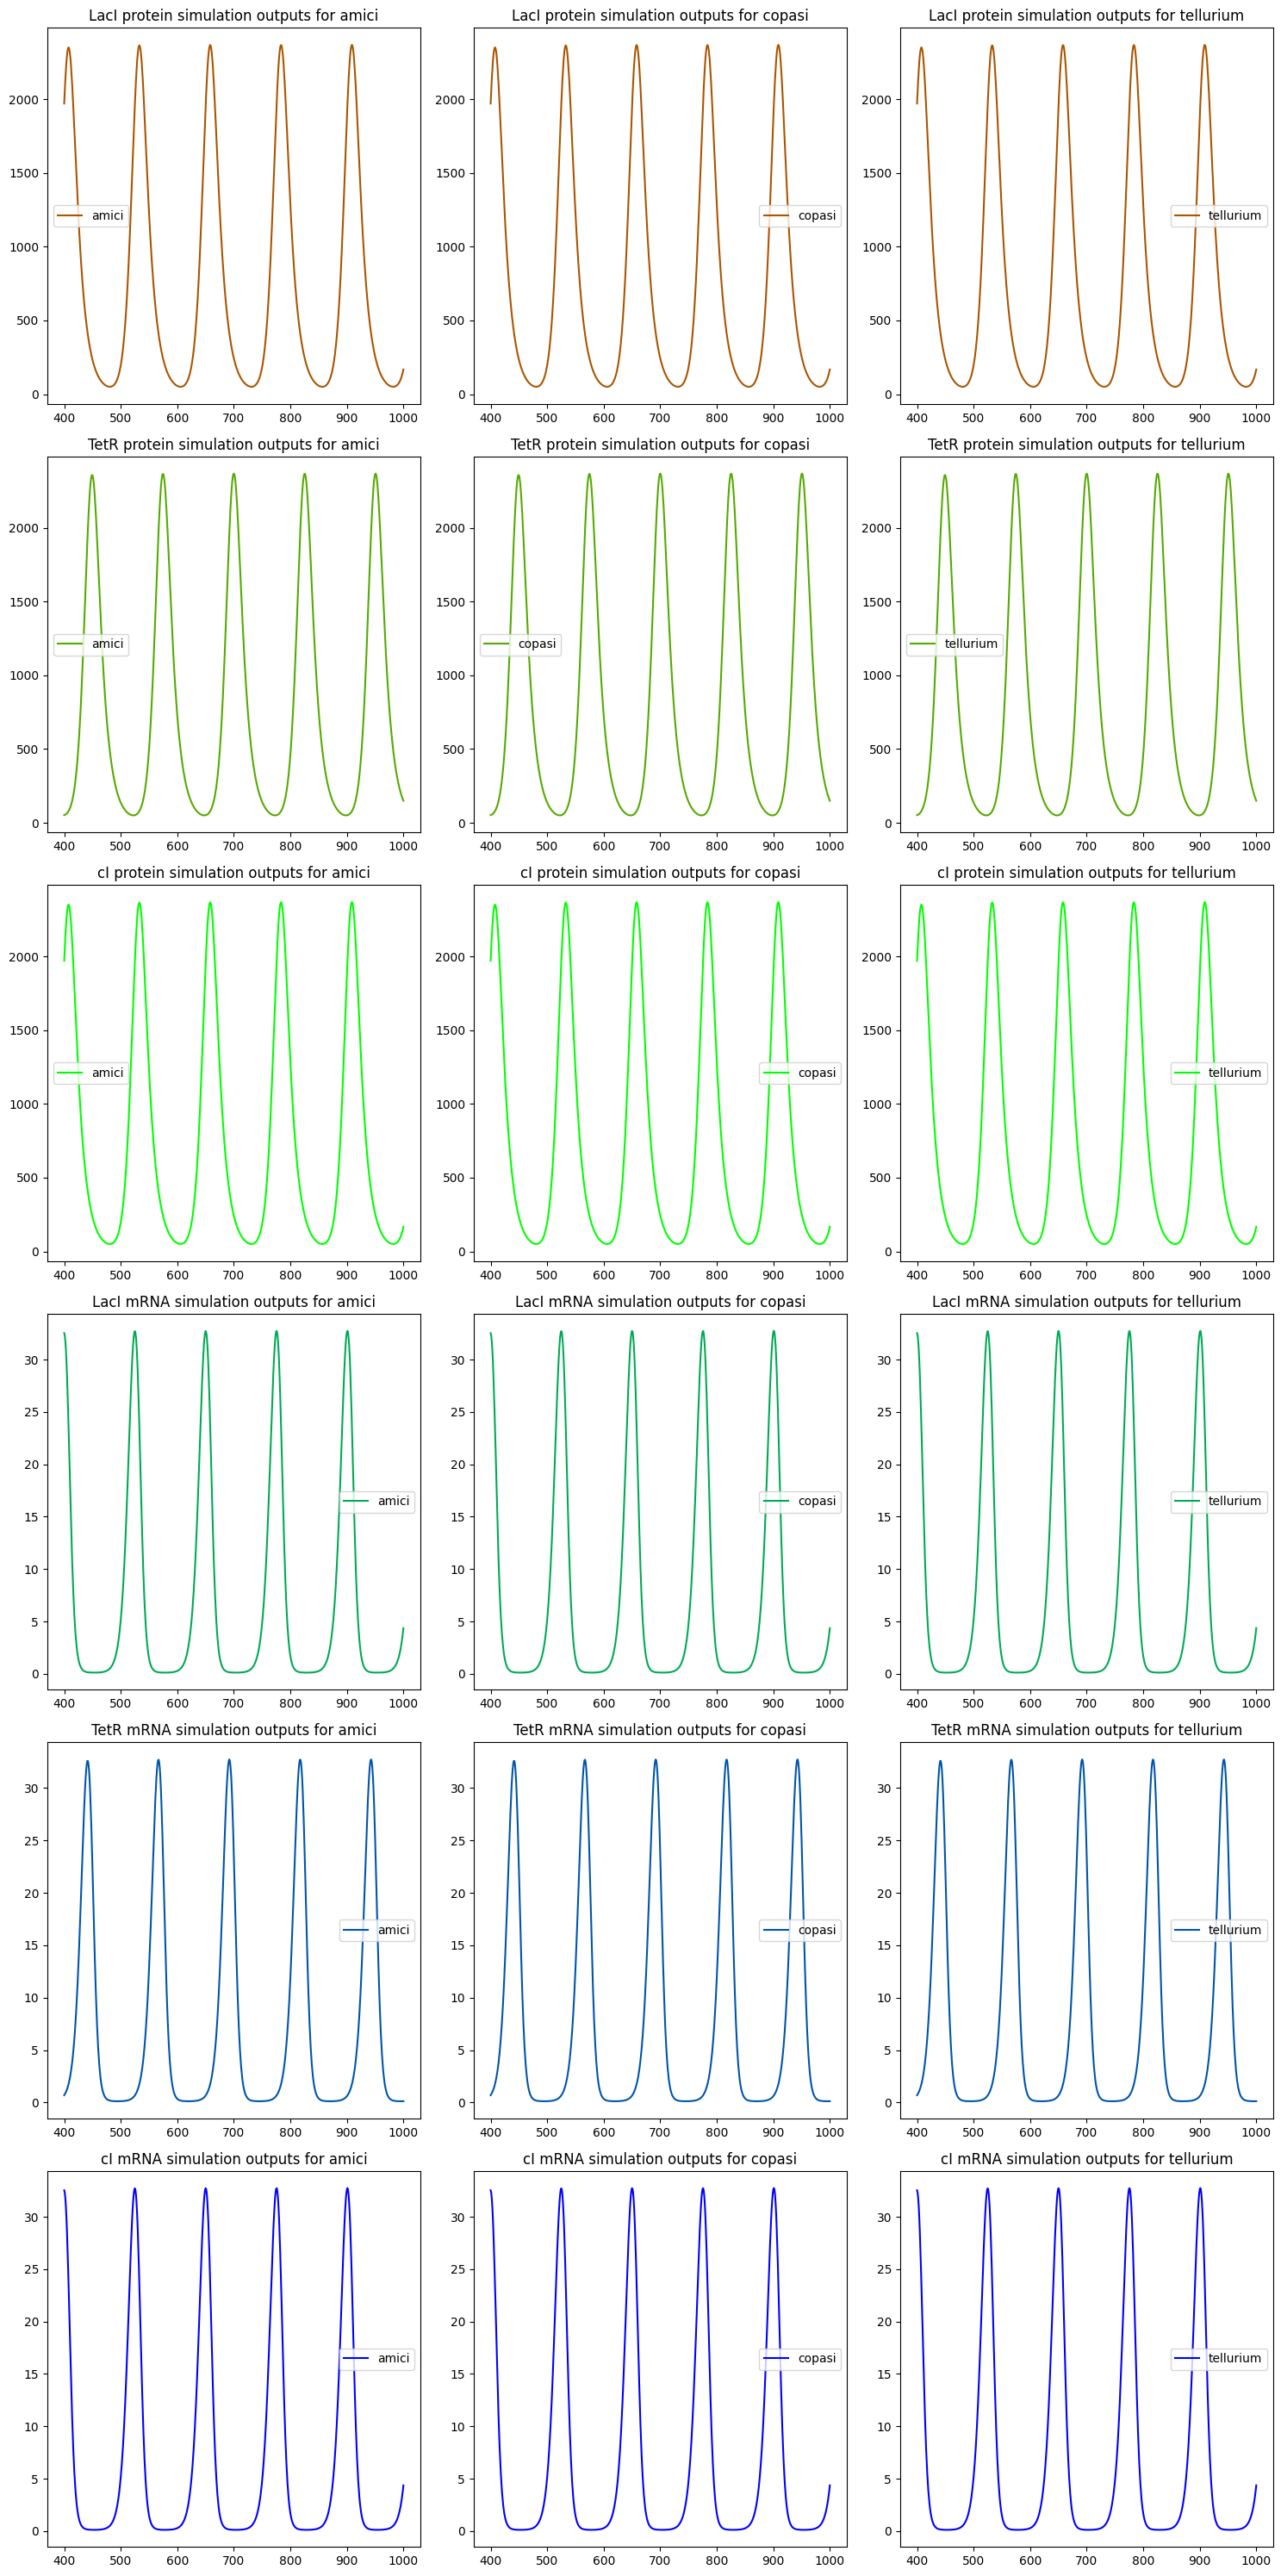

In [25]:
# color-coded by each row (observable name)
output_plots_species_hue = verifier.visualize_outputs(
    data=verification_data,
    simulators=['amici', 'copasi', 'tellurium'],
    output_start=400,
    output_end=1000,
    num_points=600,
    hue='species'
)

### 4b. Plot the comparison data in the form of a heatmap.

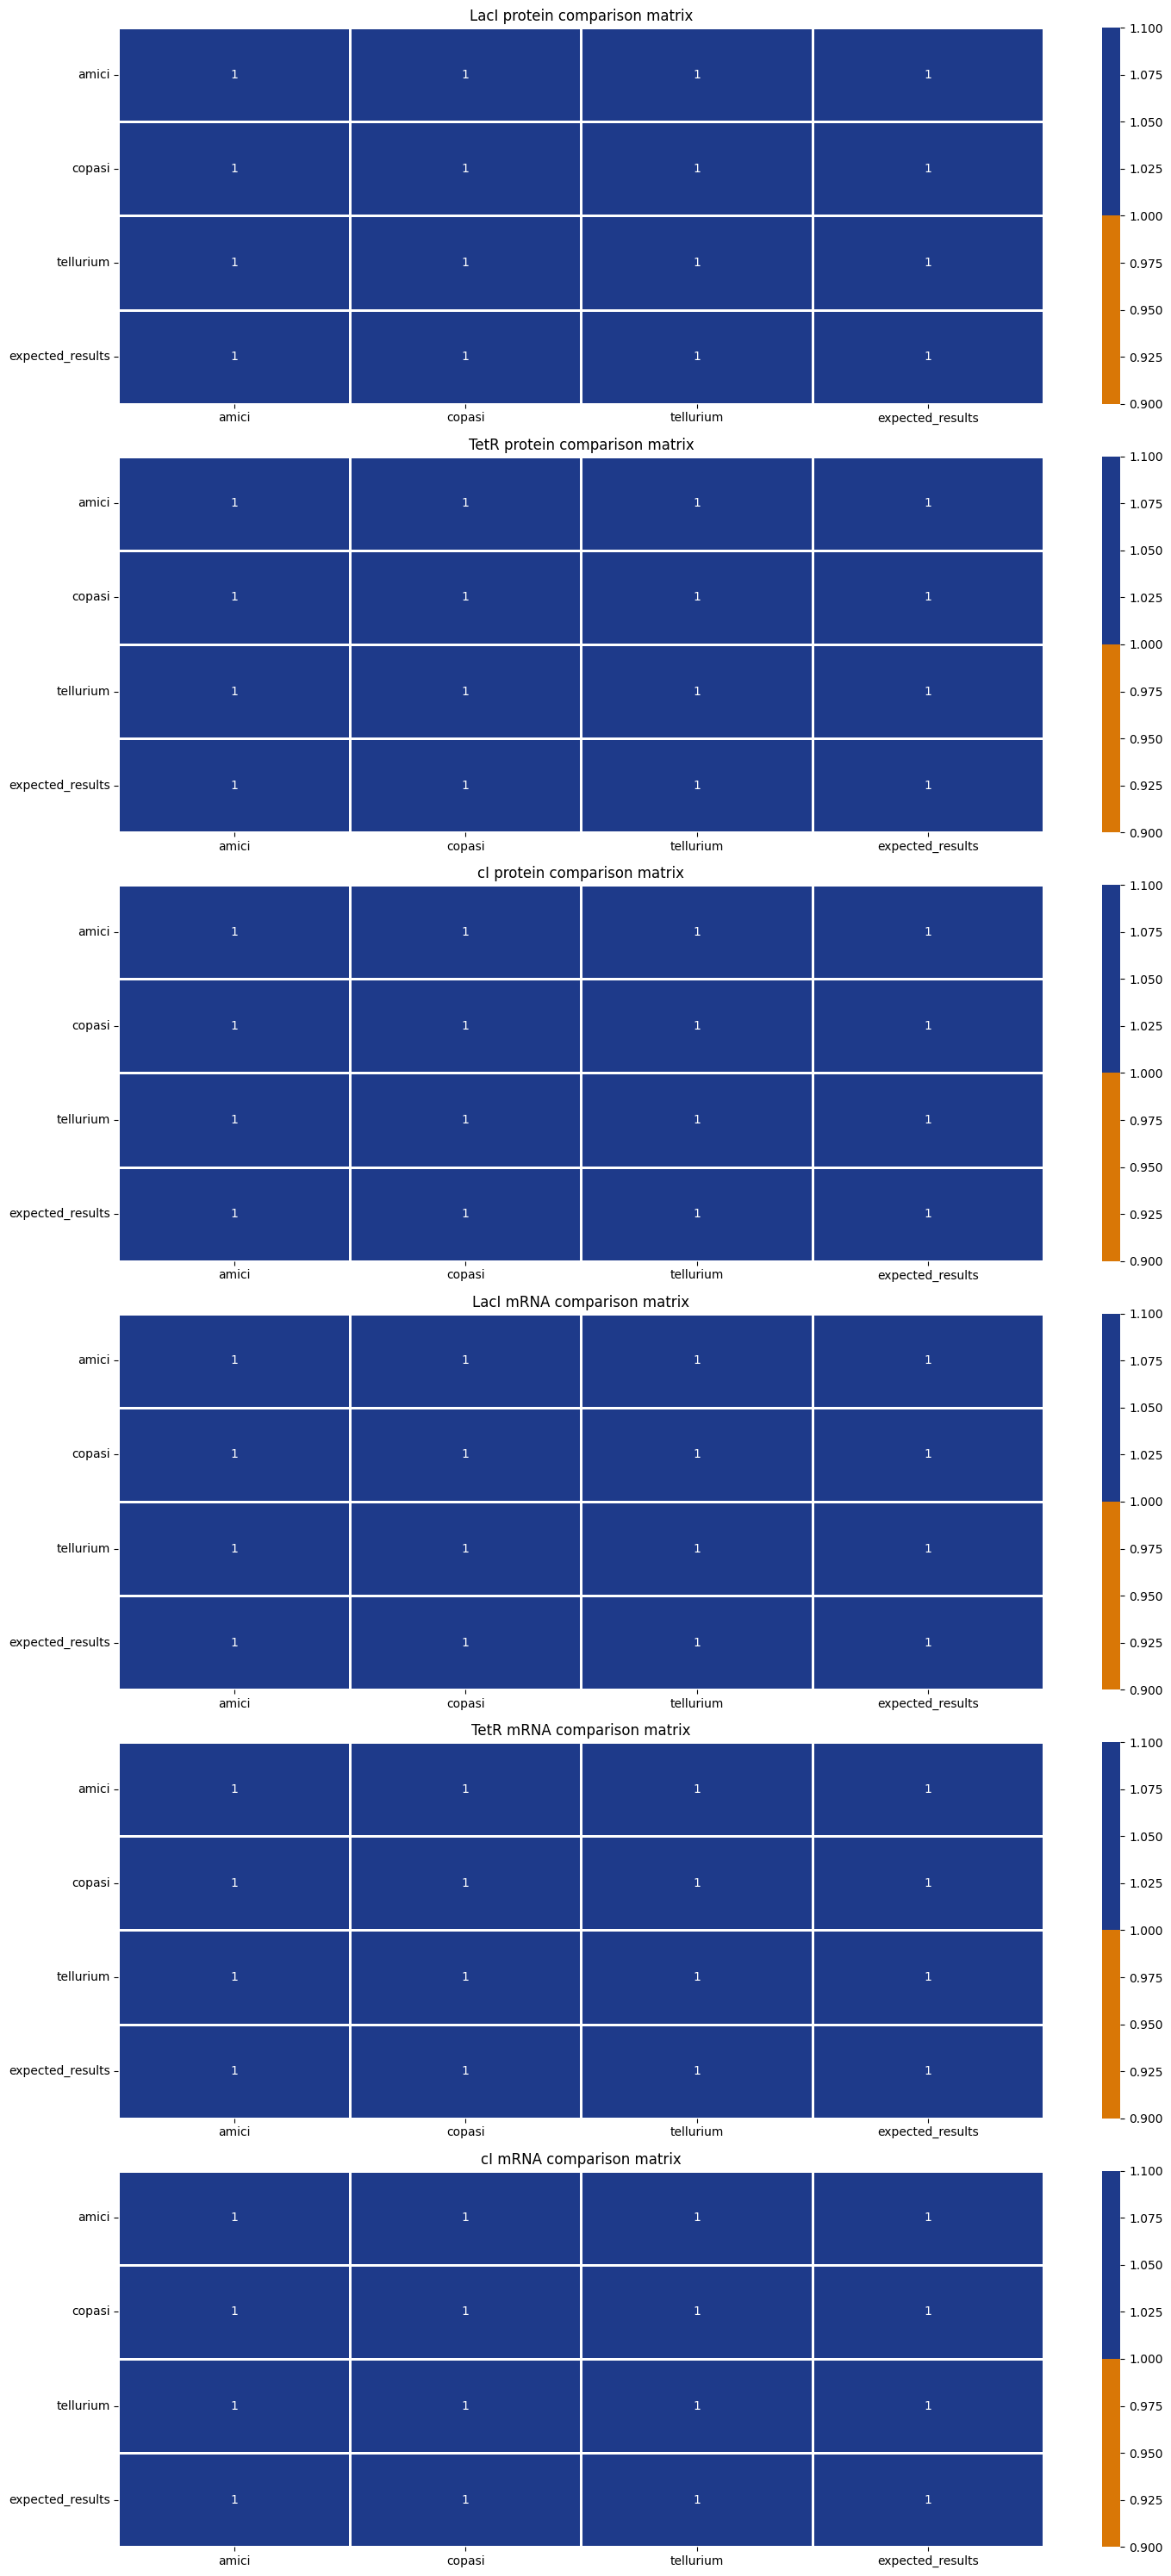

In [29]:
comparison_plots = verifier.visualize_comparison(
    data=verification_data,
    simulators=['amici', 'copasi', 'tellurium', 'expected_results'],
    comparison_type='proximity'
)

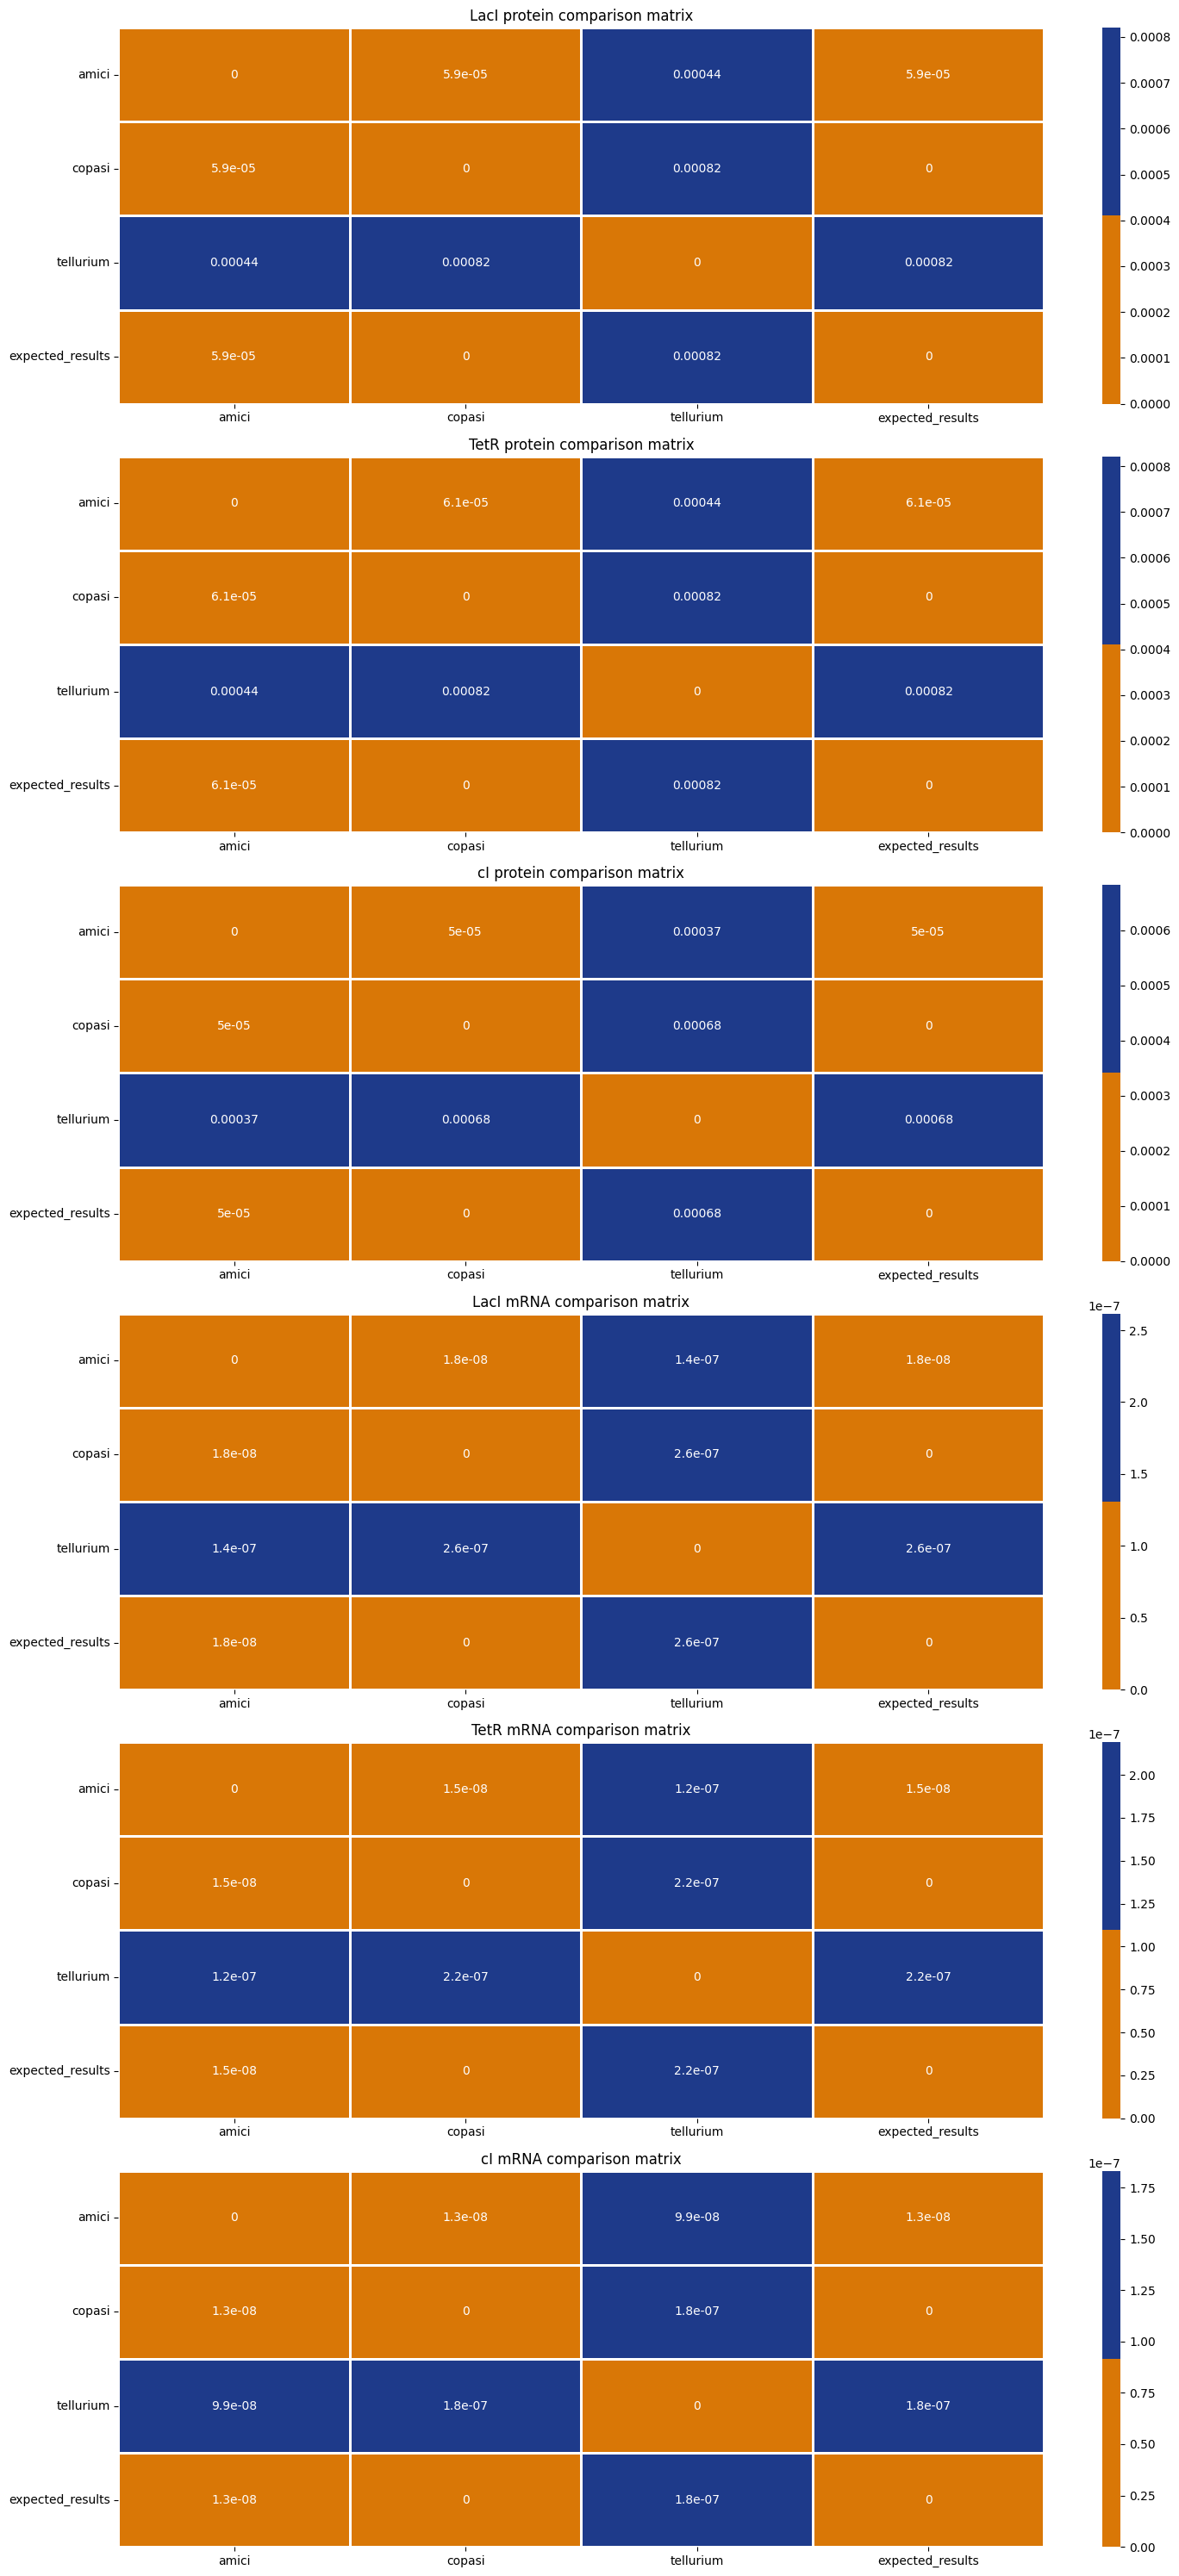

In [30]:
# plot comparison matrix for Mean Squared Error
comparison_plots_mse = verifier.visualize_comparison(
    data=verification_data,
    simulators=['amici', 'copasi', 'tellurium', 'expected_results'],
    comparison_type='mse'
)

### 5a. Save any generated plot with the verifier.

In [31]:
verifier.export_plot(fig=comparison_plots, save_dest=f"/content/repressilator-comparison.pdf")

### 5b. Save an output plot grid

In [32]:
verifier.export_plot(fig=output_plots_simulator_hue, save_dest=f"/content/repressilator-observables.pdf")

### 6a. Export data to CSV

In [33]:
verifier.export_csv(data=verification_data, save_dest=f"/content/repressilator-observables.csv", simulators=simulators)

### 6b. Read in any exported CSV file as a pandas dataframe

In [34]:
verifier.read_observables("/content/repressilator-observables.csv")

,LacI protein_amici,LacI protein_copasi,LacI protein_tellurium,TetR protein_amici,TetR protein_copasi,TetR protein_tellurium,cI protein_amici,cI protein_copasi,cI protein_tellurium,LacI mRNA_amici,LacI mRNA_copasi,LacI mRNA_tellurium,TetR mRNA_amici,TetR mRNA_copasi,TetR mRNA_tellurium,cI mRNA_amici,cI mRNA_copasi,cI mRNA_tellurium
0,1971.268573,1971.270446,1971.265339,51.895554,51.895620,51.895323,1971.268573,1971.270446,1971.265339,32.523911,32.523889,32.524067,0.689213,0.689216,0.689204,32.523911,32.523889,32.524067
1,2056.478843,2056.480504,2056.474962,53.318600,53.318683,53.318418,2056.478843,2056.480504,2056.474962,32.302486,32.302454,32.302603,0.774583,0.774587,0.774574,32.302486,32.302454,32.302603
2,2133.475001,2133.476360,2133.472650,55.257774,55.257876,55.257563,2133.475001,2133.476360,2133.472650,31.777324,31.777281,31.777481,0.871931,0.871935,0.871921,31.777324,31.777281,31.777481
3,2200.760995,2200.761993,2200.761147,57.764048,57.764172,57.763840,2200.760995,2200.761993,2200.761147,30.946462,30.946407,30.946693,0.982860,0.982864,0.982849,30.946462,30.946407,30.946693
4,2256.962433,2256.962984,2256.965006,60.896368,60.896516,60.896120,2256.962433,2256.962984,2256.965006,29.818385,29.818316,29.818618,1.109167,1.109172,1.109154,29.818385,29.818316,29.818618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,109.137255,109.139883,109.129681,193.464301,193.461304,193.472947,109.137255,109.139883,109.129681,2.679883,2.679961,2.679657,0.112850,0.112850,0.112851,2.679883,2.679961,2.679657
597,120.938334,120.941340,120.929654,181.264906,181.262111,181.272977,120.938334,120.941340,120.929654,3.030193,3.030281,3.029939,0.113085,0.113085,0.113086,3.030193,3.030281,3.029939
598,134.440854,134.444280,134.430938,169.885196,169.882590,169.892728,134.440854,134.444280,134.430938,3.424273,3.424372,3.423987,0.113661,0.113662,0.113661,3.424273,3.424372,3.423987
599,149.839122,149.843019,149.827826,159.272577,159.270147,159.279604,149.839122,149.843019,149.827826,3.866630,3.866741,3.866308,0.114584,0.114584,0.114584,3.866630,3.866741,3.866308


### 7. Create a dataframe from the time series data generated from the above `verifier.get_verifiy_output()` calls

In [35]:
verifier.get_observables(data=verification_data, simulators=simulators)

,LacI protein_amici,LacI protein_copasi,LacI protein_tellurium,TetR protein_amici,TetR protein_copasi,TetR protein_tellurium,cI protein_amici,cI protein_copasi,cI protein_tellurium,LacI mRNA_amici,LacI mRNA_copasi,LacI mRNA_tellurium,TetR mRNA_amici,TetR mRNA_copasi,TetR mRNA_tellurium,cI mRNA_amici,cI mRNA_copasi,cI mRNA_tellurium
0,1971.268573,1971.270446,1971.265339,51.895554,51.895620,51.895323,1971.268573,1971.270446,1971.265339,32.523911,32.523889,32.524067,0.689213,0.689216,0.689204,32.523911,32.523889,32.524067
1,2056.478843,2056.480504,2056.474962,53.318600,53.318683,53.318418,2056.478843,2056.480504,2056.474962,32.302486,32.302454,32.302603,0.774583,0.774587,0.774574,32.302486,32.302454,32.302603
2,2133.475001,2133.476360,2133.472650,55.257774,55.257876,55.257563,2133.475001,2133.476360,2133.472650,31.777324,31.777281,31.777481,0.871931,0.871935,0.871921,31.777324,31.777281,31.777481
3,2200.760995,2200.761993,2200.761147,57.764048,57.764172,57.763840,2200.760995,2200.761993,2200.761147,30.946462,30.946407,30.946693,0.982860,0.982864,0.982849,30.946462,30.946407,30.946693
4,2256.962433,2256.962984,2256.965006,60.896368,60.896516,60.896120,2256.962433,2256.962984,2256.965006,29.818385,29.818316,29.818618,1.109167,1.109172,1.109154,29.818385,29.818316,29.818618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,109.137255,109.139883,109.129681,193.464301,193.461304,193.472947,109.137255,109.139883,109.129681,2.679883,2.679961,2.679657,0.112850,0.112850,0.112851,2.679883,2.679961,2.679657
597,120.938334,120.941340,120.929654,181.264906,181.262111,181.272977,120.938334,120.941340,120.929654,3.030193,3.030281,3.029939,0.113085,0.113085,0.113086,3.030193,3.030281,3.029939
598,134.440854,134.444280,134.430938,169.885196,169.882590,169.892728,134.440854,134.444280,134.430938,3.424273,3.424372,3.423987,0.113661,0.113662,0.113661,3.424273,3.424372,3.423987
599,149.839122,149.843019,149.827826,159.272577,159.270147,159.279604,149.839122,149.843019,149.827826,3.866630,3.866741,3.866308,0.114584,0.114584,0.114584,3.866630,3.866741,3.866308
